# Install libraries

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
# opencv is pre-installed on colab
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install mxnet-cu101

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 26kB/s 
     |████████████████████████████████| 6.6MB 71.7MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 276kB 4.7MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=0af4b45b3bda5b653764bec0d781ec9970ebf1a7a68fc555e634dc638e125b66
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip

In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Read Video

In [ ]:
%%time
!rm -r frames/*
!mkdir frames/

#specify path to video
video = "/content/drive/My Drive/test_video.mp4"

#capture video
cap = cv2.VideoCapture(video)
cnt=0
# cap = cv2.VideoCapture(0)  # Use this if you want to use webcam feed

# Check if video file is opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret,first_frame = cap.read()

#Read until video is completed
while(cap.isOpened()):
    
  # Capture frame-by-frame
  ret, frame = cap.read()
     
  if ret == True:

    #save each frame to folder        
    cv2.imwrite('frames/'+str(cnt)+'.png', frame)
    cnt=cnt+1
    if(cnt==750):
      break

  # Break the loop
  else: 
    break

rm: cannot remove 'frames/*': No such file or directory
CPU times: user 11.8 s, sys: 443 ms, total: 12.2 s
Wall time: 16.1 s


In [ ]:
#frame rate of a video
FPS=cap.get(cv2.CAP_PROP_FPS)
print(FPS)

25.0


# Add models

In [ ]:
cfg = get_cfg()

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_f97cb7.pkl: 136MB [00:06, 21.6MB/s]                           


In [ ]:
#read an image
img = cv2.imread("frames/30.png")

#pass to the model
outputs = predictor(img)

# Visualize it

In [ ]:
# Use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

# Draw Boundary box

In [ ]:
classes=outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[1.60944092e+03 6.78508728e+02 1.74156238e+03 9.65138306e+02]
 [6.53585144e+02 7.43911743e+02 8.18908875e+02 1.07188843e+03]
 [1.76489563e+03 3.94923798e+02 1.83660803e+03 5.86393677e+02]
 [2.69585972e+01 7.76356812e+02 1.38741638e+02 1.07358325e+03]
 [1.43715710e+03 1.65152954e+02 1.49410510e+03 3.29020630e+02]
 [5.43299683e+02 1.68147369e+02 6.07129333e+02 3.33060364e+02]
 [1.65602942e+03 4.03170135e+02 1.73478564e+03 5.94744263e+02]
 [1.35703577e+03 7.90958557e+01 1.41118347e+03 2.26211884e+02]
 [1.55441174e+03 0.00000000e+00 1.60095374e+03 1.25967621e+02]
 [7.72304199e+02 2.41004501e+02 8.37815796e+02 4.40273956e+02]
 [1.71435779e+03 2.11461273e+02 1.77613818e+03 3.69278107e+02]
 [1.72500595e+02 4.19082855e+02 2.70833282e+02 5.99561096e+02]
 [7.04751892e+02 1.51750046e+02 7.56465088e+02 2.63303955e+02]
 [1.49759912e+03 1.21036935e+00 1.53918494e+03 1.04733177e+02]
 [1.24004968e+03 1.76762331e+00 1.28697083e+03 1.06223526e+02]
 [1.12186375e+01 2.69135040e+02 9.40451965e+01 4.361777

In [ ]:
#identity only persons 
ind = np.where(classes==0)[0]

#identify bounding box of only persons
person=bbox[ind]

#total no. of persons
num= len(person)

In [ ]:
x1,y1,x2,y2 = person[0]
print(x1,y1,x2,y2)

1609.4409 678.5087 1741.5624 965.1383


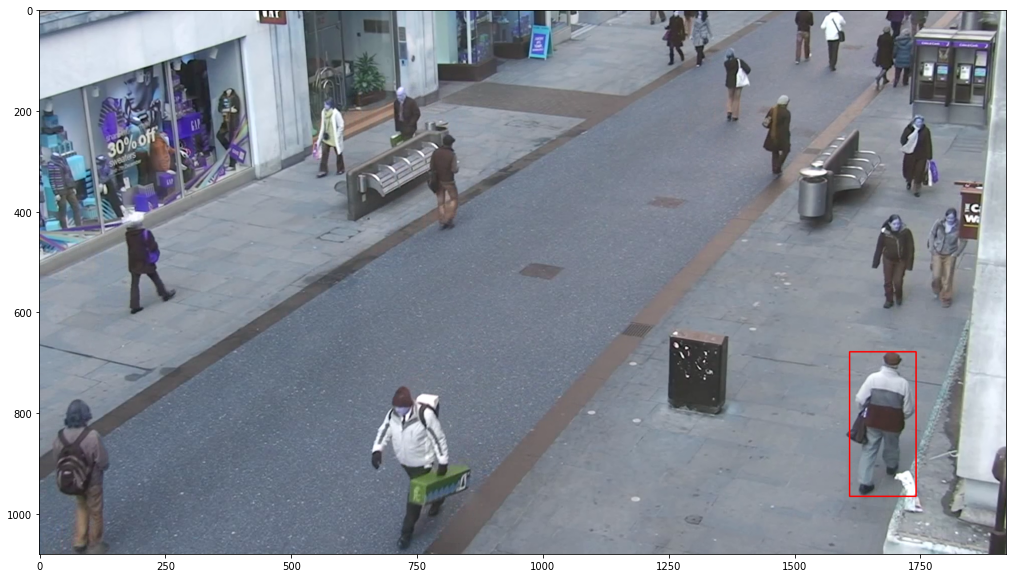

In [ ]:
img = cv2.imread('frames/30.png')
_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

plt.figure(figsize=(20,10))
plt.imshow(img)

# Compute the centre

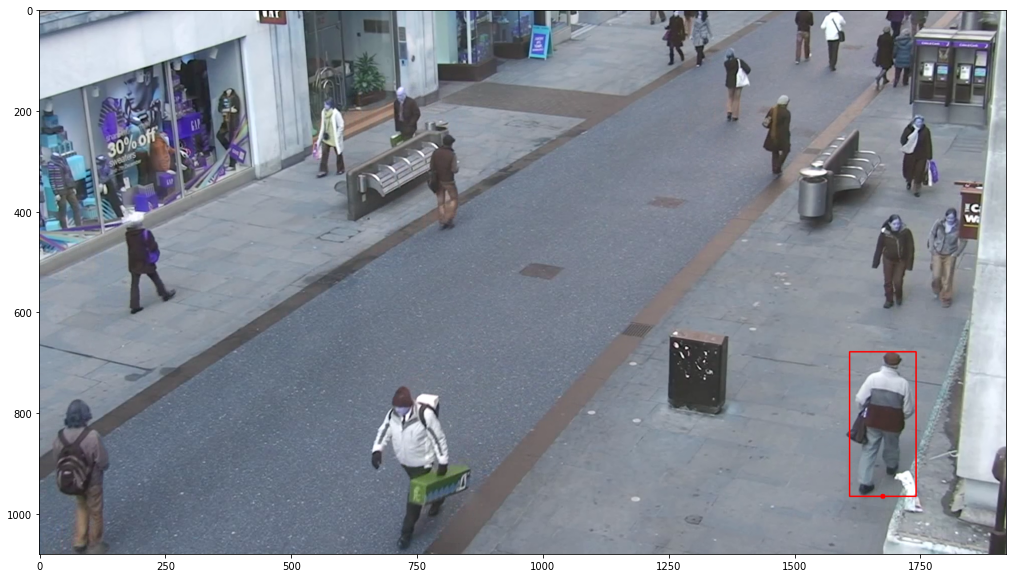

In [ ]:
#compute center 
x_center = int((x1+x2)/2)
y_center = int(y2)

center = (x_center, y_center)

_ = cv2.circle(img, center, 5, (255, 0, 0), -1)
plt.figure(figsize=(20,10))
plt.imshow(img)

# Calculate the distance and mark the points

In [ ]:
#define a function which return the bottom center of every bbox
def mid_point(img,person,idx):
  #get the coordinates
  x1,y1,x2,y2 = person[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
  
  #compute bottom center of bbox
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid   = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 0, 255), -1)
  cv2.putText(img, str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)
  
  return mid

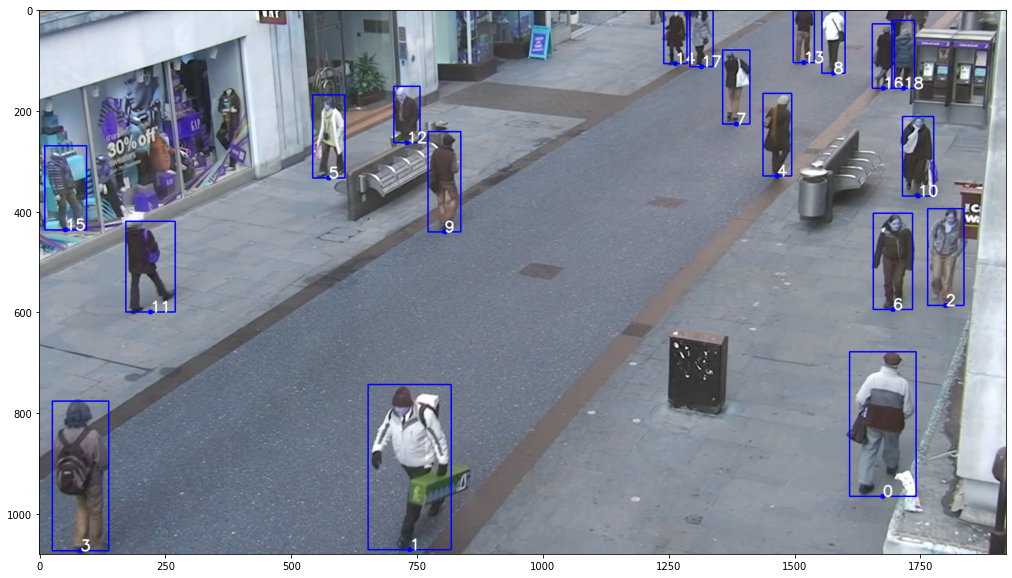

In [ ]:
#call the function
midpoints = [mid_point(img,person,i) for i in range(len(person))]

#visualize image
plt.figure(figsize=(20,10))
plt.imshow(img)

# Using Euclidean distance 

In [ ]:
%%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

CPU times: user 11 µs, sys: 3 µs, total: 14 µs
Wall time: 17.9 µs


In [ ]:
dist= compute_distance(midpoints,num)

In [ ]:
%%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 19.1 µs


# Find the closest person using Proximity distance

In [ ]:
import pandas as pd

thresh=100
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

,p1,p2,dist
0,8,13,62.625873
1,14,17,52.345009
2,16,18,40.000000


# Change to red

In [ ]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)  
  return img

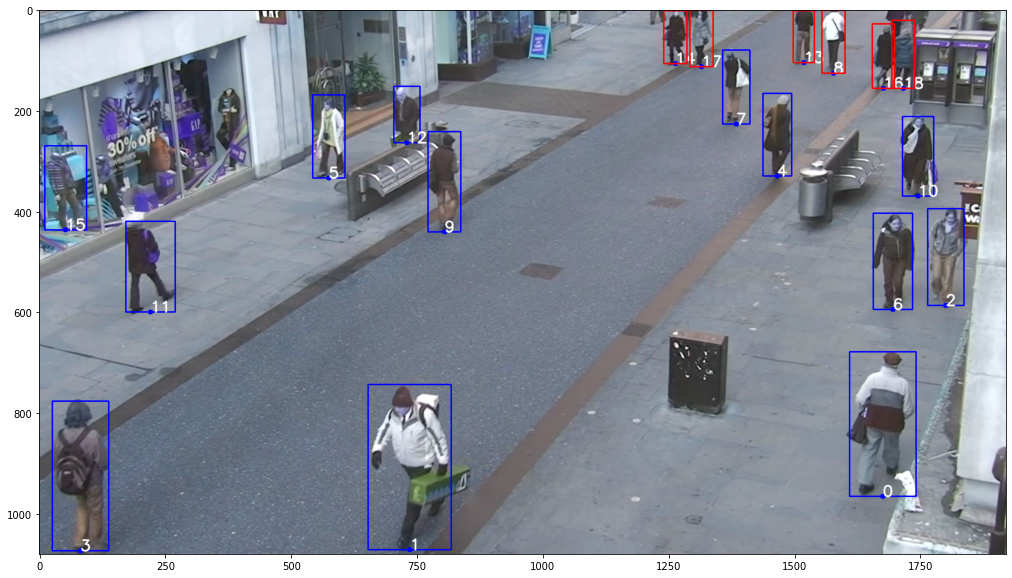

In [ ]:
img = change_2_red(img,person,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

# Frame by frame 

In [ ]:
import os
import re

names=os.listdir('frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [ ]:
def find_closest_people(name,thresh):

  img = cv2.imread('frames/'+name)
  outputs = predictor(img)
  classes=outputs['instances'].pred_classes.cpu().numpy()
  bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person=bbox[ind]
  midpoints = [mid_point(img,person,i) for i in range(len(person))]
  num = len(midpoints)
  dist= compute_distance(midpoints,num)
  p1,p2,d=find_closest(dist,num,thresh)
  img = change_2_red(img,person,p1,p2)
  cv2.imwrite('frames/'+name,img)
  return 0

In [ ]:
from tqdm import tqdm
thresh=100
_ = [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]

100%|██████████| 104/104 [01:10<00:00,  1.47it/s]


In [ ]:
%%time
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    
    #reading each files
    img = cv2.imread('frames/'+frames[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

out = cv2.VideoWriter('/content/drive/My Drive/sample_video.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

CPU times: user 6.15 s, sys: 206 ms, total: 6.35 s
Wall time: 6.22 s
